# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

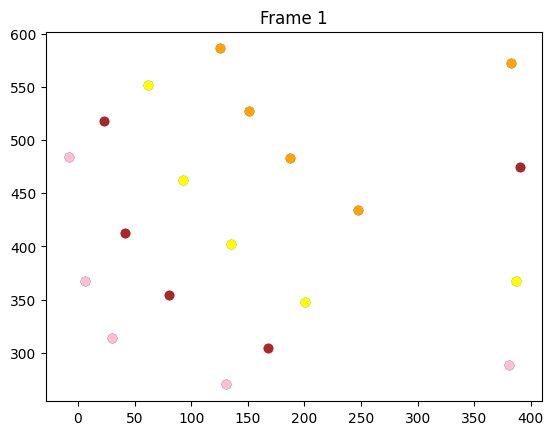

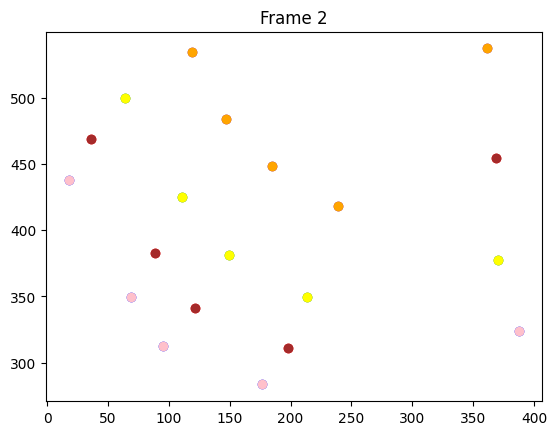

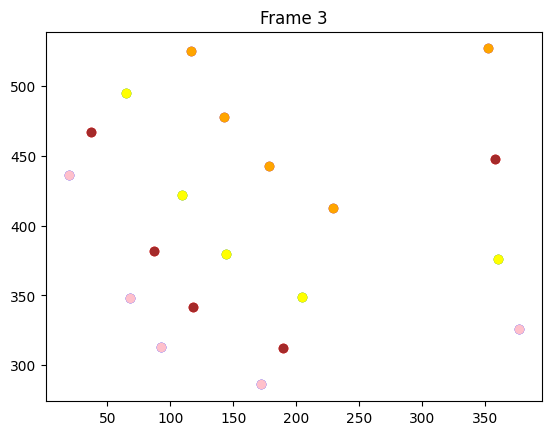

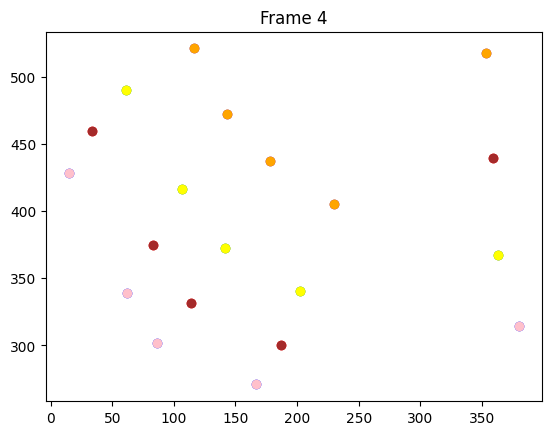

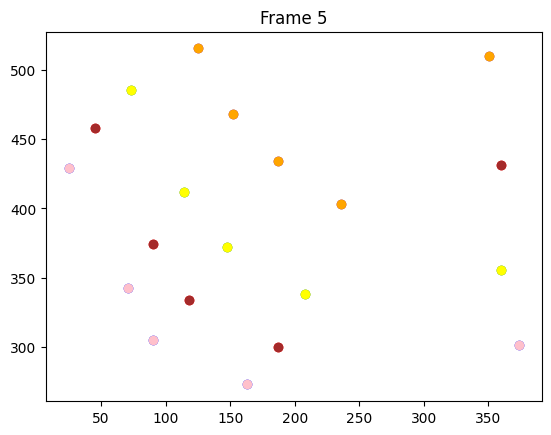

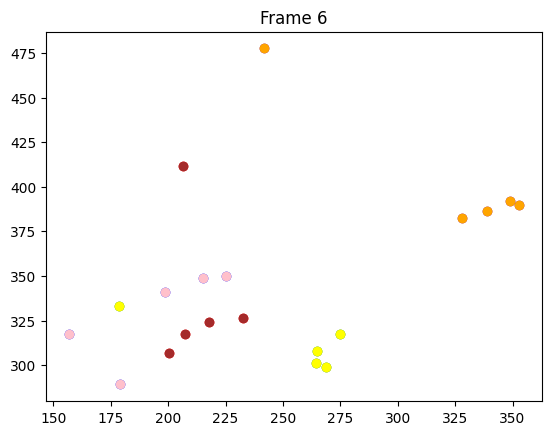

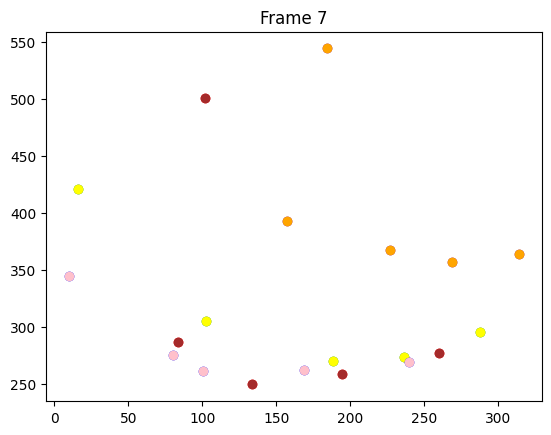

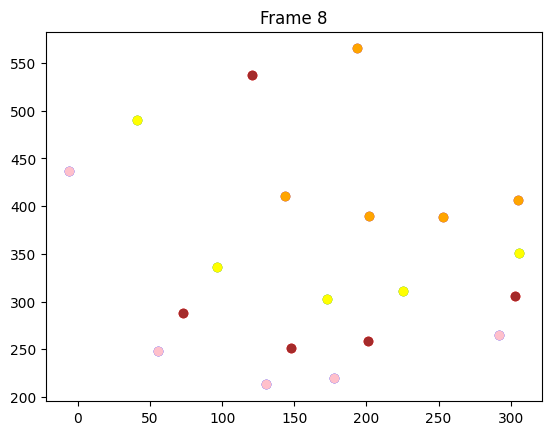

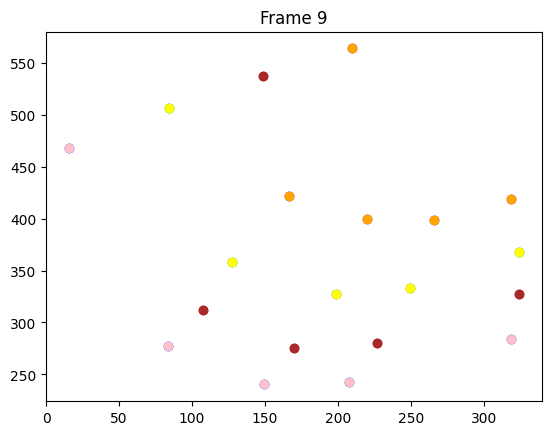

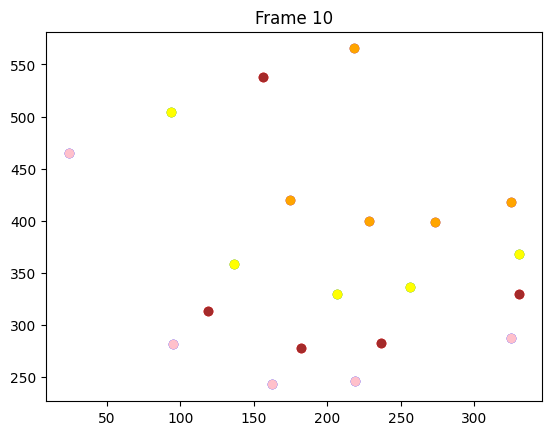

Frame 1:
Name tom
Mode 1
Timestamp: 06:18:23.867000
Mean Distance: 200.56
Minimum Distance: 45.75
Maximum Distance: 437.33
Standard Deviation: 108.28

Frame 2:
Name tom
Mode 1
Timestamp: 06:18:24.032000
Mean Distance: 166.48
Minimum Distance: 34.46
Maximum Distance: 387.53
Standard Deviation: 93.89

Frame 3:
Name tom
Mode 1
Timestamp: 06:18:24.201000
Mean Distance: 159.96
Minimum Distance: 31.64
Maximum Distance: 374.37
Standard Deviation: 90.87

Frame 4:
Name tom
Mode 1
Timestamp: 06:18:24.367000
Mean Distance: 164.12
Minimum Distance: 35.98
Maximum Distance: 383.23
Standard Deviation: 92.63

Frame 5:
Name tom
Mode 1
Timestamp: 06:18:24.535000
Mean Distance: 158.73
Minimum Distance: 35.19
Maximum Distance: 371.88
Standard Deviation: 89.35

Frame 6:
Name tom
Mode 1
Timestamp: 06:18:24.703000
Mean Distance: 88.26
Minimum Distance: 4.81
Maximum Distance: 209.23
Standard Deviation: 55.67

Frame 7:
Name tom
Mode 1
Timestamp: 06:18:24.902000
Mean Distance: 144.60
Minimum Distance: 5.14
Maxi

In [27]:
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime

with open('sessionData5.txt', 'r') as file:
    lines = file.read()

# each frame contains the delimieter using the string 'END OF DATA FOR FRAME'
frames = re.split(r'END OF DATA FOR FRAME \d+', lines)

# drop first frame, colors array
frames = frames[0:10]
colors = ['blue', 'green', 'red', 'purple', 'pink', 'yellow', 'brown', 'orange']

# store statistics for each frame plus timestamps
frame_means = []
frame_mins = []
frame_maxs = []
frame_stds = []
frame_timestamps = []

# for each frame we want to get all the points, saev the timestamps,
# and calulate some basic data...
for i, frame in enumerate(frames):

    points = re.findall(r'(\w+\.\w+): ([\d.-]+), (\w+\.\w+): ([\d.-]+)', frame)

    # print(points)

    name_match = re.search(r'Name: (\w+)', frame)
    name = name_match.group(1)

    mode_match = re.search(r'Mode: (\d+)', frame)
    mode = int(mode_match.group(1))

    timestamp_match = re.search(r'Timestamp: (\d+)', frame)
    timestamp = int(timestamp_match.group(1))
    timestamp_datetime = datetime.utcfromtimestamp(timestamp / 1000).strftime('%H:%M:%S.%f')

    # store x and y coordinates for all points
    x_coords = []
    y_coords = []

    for label_x, x, label_y, y in points:
        x_coords.append(float(x))
        y_coords.append(float(y))

    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)

    # Euclidean distances between points
    distances = np.sqrt((x_coords[:, np.newaxis] - x_coords)**2 + (y_coords[:, np.newaxis] - y_coords)**2)
    # print(f'\ndistances:{distances}, x_coords:{x_coords}, y_coords:{y_coords}')

    frame_mean = np.mean(distances)
    frame_min = np.min(distances[distances > 0])
    frame_max = np.max(distances)
    frame_std = np.std(distances)

    frame_means.append(frame_mean)
    frame_mins.append(frame_min)
    frame_maxs.append(frame_max)
    frame_stds.append(frame_std)
    frame_timestamps.append(timestamp_datetime)

    plt.figure(i)
    plt.title(f'Frame {i + 1}')

    for j, (label_x, x, label_y, y) in enumerate(points):
        # color for each point, keep consistent among all
        color = colors[j % len(colors)]
        plt.plot(float(x), float(y), 'o', label=label_x, color=color)

plt.show()

# statistics about data points for EACH frame
for i, (mean, minimum, maximum, std_dev, timestamp) in enumerate(zip(frame_means, frame_mins, frame_maxs, frame_stds, frame_timestamps), 1):
    print(f'Frame {i}:')
    print(f'Name {name}')
    print(f'Mode {mode}')
    print(f'Timestamp: {timestamp}')
    print(f'Mean Distance: {mean:.2f}')
    print(f'Minimum Distance: {minimum:.2f}')
    print(f'Maximum Distance: {maximum:.2f}')
    print(f'Standard Deviation: {std_dev:.2f}')
    print()


In [28]:
# print("distances between all tips:")
# for i, tip_name in enumerate(["thumbTip", "indexTip", "middleTip", "ringTip", "littleTip"]):
#     for j, other_tip_name in enumerate(["thumbTip", "indexTip", "middleTip", "ringTip", "littleTip"]):
#         if i != j:
#             distance = distances[i, j]
#             print(f"{tip_name} to {other_tip_name}: {distance:.2f}")

distances between all tips:
thumbTip to indexTip: 79.70
thumbTip to middleTip: 151.24
thumbTip to ringTip: 218.28
thumbTip to littleTip: 0.00
indexTip to thumbTip: 79.70
indexTip to middleTip: 71.54
indexTip to ringTip: 138.66
indexTip to littleTip: 79.70
middleTip to thumbTip: 151.24
middleTip to indexTip: 71.54
middleTip to ringTip: 67.20
middleTip to littleTip: 151.24
ringTip to thumbTip: 218.28
ringTip to indexTip: 138.66
ringTip to middleTip: 67.20
ringTip to littleTip: 218.28
littleTip to thumbTip: 0.00
littleTip to indexTip: 79.70
littleTip to middleTip: 151.24
littleTip to ringTip: 218.28


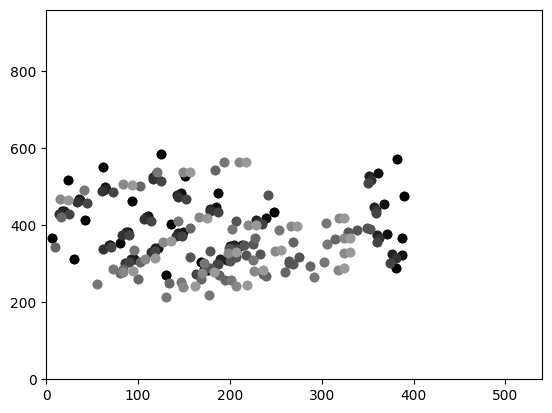

In [10]:
# Initialize colors again
# this is greyscale for 25 frames
colors = ['#000000', '#111111', '#222222', '#333333', '#444444', '#555555',
          '#666666', '#777777', '#888888', '#999999', '#aaaaaa', '#bbbbbb',
          '#cccccc', '#dddddd', '#eeeeee', '#f0f0f0', '#f1f1f1', '#f2f2f2',
          '#f3f3f3', '#f4f4f4', '#f5f5f5', '#f6f6f6', '#f7f7f7', '#f8f8f8']

fig, ax = plt.subplots()
ax.set_xlim(0, 540)
ax.set_ylim(0, 960)

# loop through each frame from sessionData.txt, each line will contain data
# for a finger point coordinate (x,y), and is sperasted by a line end \n
for i, frame in enumerate(frames):

    points = re.findall(r'(\w+\.\w+): ([\d.-]+), (\w+\.\w+): ([\d.-]+)', frame)

    x_coords = np.array([float(x) for _, x, _, _ in points])
    y_coords = np.array([float(y) for _, _, _, y in points])

    frame_min = np.min(distances[np.nonzero(distances)])
    frame_max = np.max(distances[np.nonzero(distances)])

    color = colors[i % len(colors)]
    # plot all points with a difernt color for each frame
    for j, (label_x, x, label_y, y) in enumerate(points):
        plt.plot(float(x), float(y), 'o', label=label_x, color=color)

    plt.legend().set_visible(False)

plt.show()
